# Random experiments
I use this notebook to experiment algorithims and libraries.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
from shapely import wkt, geometry
from osgeo import gdal_array
from osgeo import ogr, osr
import pyproj
warnings.filterwarnings('ignore')
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print("GeoPandas version: %s"%gpd.__version__)

NumPy version: 1.23.1
Pandas version: 1.4.3
GeoPandas version: 0.11.1


In [2]:
from shapely.geometry import Point, LineString, Polygon

north_lat = 46.4849007243099
west_long = 11.3308448611978 
south_lat = 46.3337007085374
east_long = 11.4133279550278
bbox = {
    north_lat, west_long, south_lat, east_long   
}

north_west = Point(west_long, north_lat)
south_west = Point(west_long, south_lat)
south_east = Point(east_long, south_lat)
north_east = Point(east_long, north_lat)

bbox_names = ['north west', 'south west', 'south east', 'north east']
bbox_geometries = [north_west, south_west, south_east, north_east]
bbox_dict = {'vertices': bbox_names, 'geometry': bbox_geometries}
bbox_gdf = gpd.GeoDataFrame(bbox_dict, crs="EPSG:4326")

In [3]:
bbox_geometries.append(north_west)
bbox_polygon = Polygon(bbox_geometries)

In [4]:
bbox_polygon_dict = {'Polygon': 'Bbox Polygon', 'geometry': bbox_polygon}
bbox_polygon_layer = gpd.GeoDataFrame(bbox_polygon_dict, crs ="EPSG:4326", index=range(0,1))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

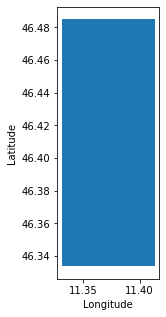

In [5]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
bbox_polygon_layer.plot(ax=ax)

## Plot a bounding box

In [6]:
from shapely.geometry import Point, LineString, Polygon
def bbox_gdf(bbox, epsg='EPSG:4326'):
    #
    # Transforms a list of two pairs of coordinates given in the form 
    # [south-east-lat, south-east-long, north-west-lat, north-west-long]
    # into a GeoPandas dataframe
    #
    south_east_lat = bbox[0]
    south_east_long = bbox[1] 
    north_west_lat = bbox[2]
    north_west_long = bbox[3]
    north_west = Point(north_west_long, north_west_lat)
    south_east = Point(south_east_long, south_east_lat)
    south_west = Point(north_west_long, south_east_lat)
    north_east = Point(south_east_long, north_west_lat)

    bbox_names = ['north west', 'south west', 'south east', 'north east', 'north west']
    bbox_geometries = [north_west, south_west, south_east, north_east, north_west]
    bbox_dict = {'vertices': bbox_names, 'geometry': bbox_geometries}
    return gpd.GeoDataFrame(bbox_dict, crs="EPSG:4326"), Polygon(bbox_geometries)

NW = (9.18303 45.55168), SE = (9.09325 45.51483)

In [7]:
osm_novate_bbox = (45.51483, 9.09325, 45.55168, 9.18303)
osm_novate_bbox_gdf, osm_novate_polygon = bbox_gdf(osm_novate_bbox)

In [8]:
image_frame_point_list = [[8.889338566832725, 45.69029224135627], 
                          [9.159585055717876, 45.6927790646609], 
                          [9.162331746044424, 45.51326154947335], 
                          [8.89296819517379, 45.51078412869796]]

In [9]:
image_frame_polygon = Polygon(image_frame_point_list)
image_frame_polygon_df = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[image_frame_polygon])

In [10]:
import folium
m = folium.Map([45.60, 9.00], zoom_start=11, tiles='cartodbpositron')
folium.GeoJson(image_frame_polygon_df).add_to(m)
folium.GeoJson(osm_novate_polygon, style_function=lambda x: {'fillColor': 'orange'}).add_to(m)
folium.LatLngPopup().add_to(m)
m